## Peepee poo poo

In [50]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'

texas_tracts = gpd.read_file('State Census Tracts/Texas/tl_2023_48_tract.shp')
dallas = gpd.read_file('Shapefiles/Dallas - Suburban.shp')

dallas_suburban = dallas.to_crs("EPSG:4269")

texas_tracts['area'] = texas_tracts.area
dallas_suburban['area'] = dallas_suburban.area

texas_tracts['boundary'] = texas_tracts.boundary
dallas_suburban['boundary'] = dallas_suburban.boundary

texas_tracts['centroid'] = texas_tracts.centroid

dallas_filtered = texas_tracts.overlay(dallas_suburban, how='intersection')

/tmp/ipykernel_880887/3817455423.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  texas_tracts['area'] = texas_tracts.area
/tmp/ipykernel_880887/3817455423.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dallas_suburban['area'] = dallas_suburban.area
/tmp/ipykernel_880887/3817455423.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  texas_tracts['centroid'] = texas_tracts.centroid
/users/lkemp/.local/lib/python3.11/site-packages/geopandas/geodataframe.py:1816: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'G

/tmp/ipykernel_880887/828846389.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: GEOGCS["GCS_unnamed",DATUM["D_GRS_80",SPHEROID["GR ...

  joined = gpd.sjoin(centroids, dallas, how="left", predicate="within")


,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,boundary,centroid,submarket_id
233,48,113,016638,48113016638,1400000US48113016638,166.38,Census Tract 166.38,G5020,S,3449205,17743,+32.6295891,-096.8758118,"POLYGON ((-96.88706 32.64507, -96.88652 32.645...",0.000333,"LINESTRING (-96.88706 32.64507, -96.88652 32.6...",POINT (-96.87609 32.62940),20.0
501,48,397,040508,48397040508,1400000US48397040508,405.08,Census Tract 405.08,G5020,S,46699897,1430938,+32.8348084,-096.4270726,"POLYGON ((-96.47505 32.83668, -96.47476 32.836...",0.004635,"LINESTRING (-96.47505 32.83668, -96.47476 32.8...",POINT (-96.41766 32.83654),42.0
503,48,397,040412,48397040412,1400000US48397040412,404.12,Census Tract 404.12,G5020,S,14301336,129641,+32.9164880,-096.3280788,"POLYGON ((-96.33992 32.90055, -96.33989 32.902...",0.001391,"LINESTRING (-96.33992 32.90055, -96.33989 32.9...",POINT (-96.31867 32.91614),42.0
507,48,397,040408,48397040408,1400000US48397040408,404.08,Census Tract 404.08,G5020,S,9935570,158086,+32.9178871,-096.3936667,"POLYGON ((-96.41829 32.91544, -96.41829 32.915...",0.000973,"LINESTRING (-96.41829 32.91544, -96.41829 32.9...",POINT (-96.39069 32.91613),42.0
508,48,397,040410,48397040410,1400000US48397040410,404.10,Census Tract 404.10,G5020,S,3109779,8995,+32.9550491,-096.3386637,"POLYGON ((-96.35698 32.95373, -96.35641 32.954...",0.000301,"LINESTRING (-96.35698 32.95373, -96.35641 32.9...",POINT (-96.33953 32.95520),42.0


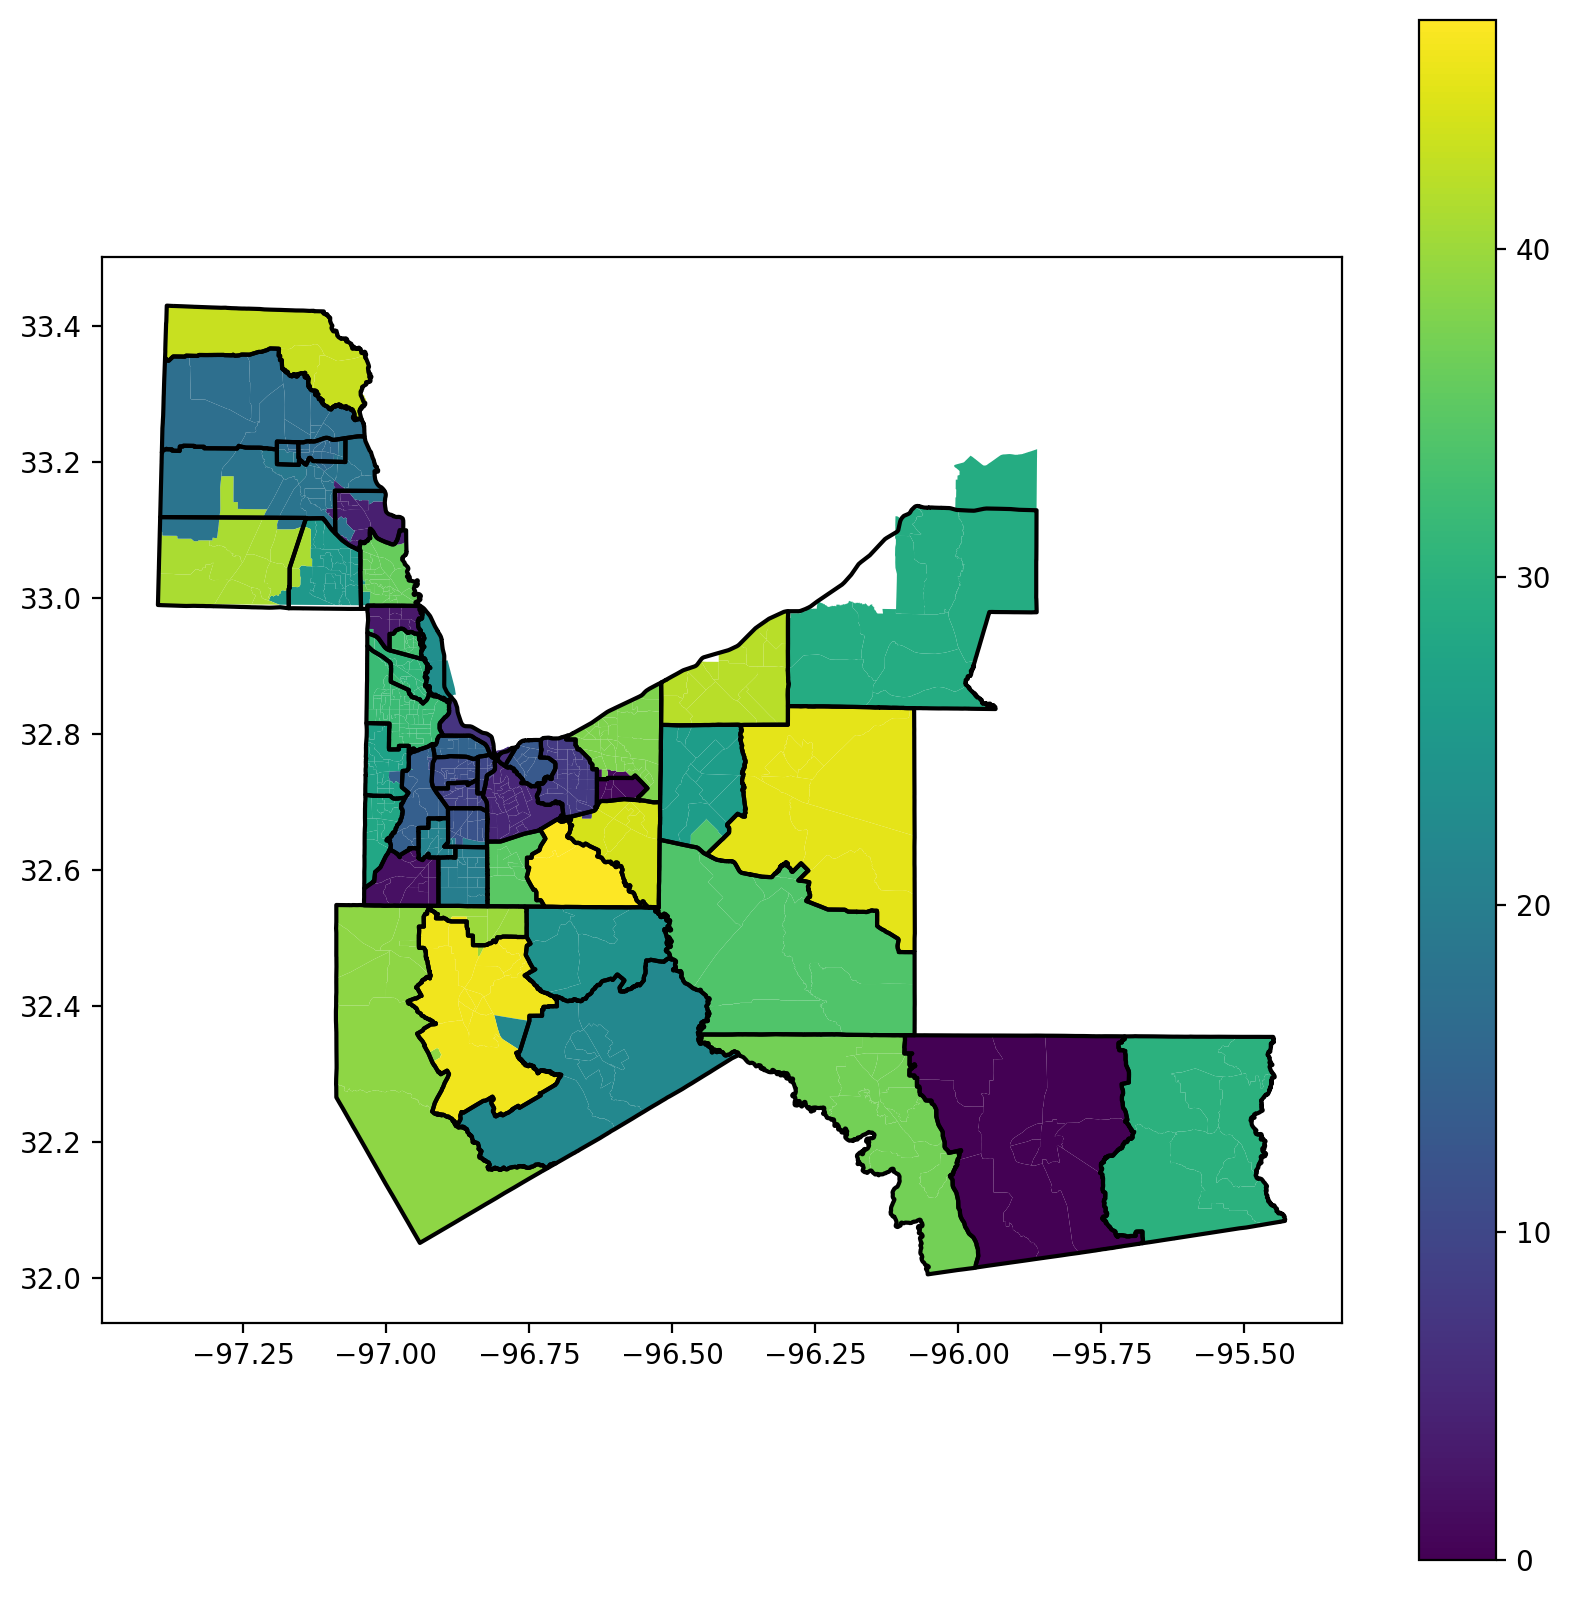

In [57]:
# Create a GeoDataFrame from the centroids
centroids = gpd.GeoDataFrame(texas_tracts[['GEOID']], geometry=texas_tracts['centroid'], crs="EPSG:4269")

# Perform a spatial join between the centroids and the submarkets
joined = gpd.sjoin(centroids, dallas, how="left", predicate="within")

# Merge the joined data back with the original texas_tracts dataframe to retain all attributes
result = texas_tracts.merge(joined[['GEOID', 'index_right']], on='GEOID')

# Rename the 'index_right' column to 'submarket_id' or any appropriate name
result = result.rename(columns={'index_right': 'submarket_id'})

# Remove tracts that are not assigned to any submarket (optional)
result = result.dropna(subset=['submarket_id'])

# Plotting the result for visualization (optional)
fig, ax = plt.subplots(figsize=(10, 10))
dallas.boundary.plot(ax=ax, color='black')
result.plot(ax=ax, column='submarket_id', legend=True, cmap='viridis')
#plt.show()

result.head()

## Repeats tracts

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'

In [2]:
import geopandas as gpd
import pandas as pd

# Load the shapefiles
tracts = gpd.read_file('State Census Tracts/Texas/tl_2023_48_tract.shp')
submarkets = gpd.read_file('Shapefiles/Dallas - Suburban.shp')

# Convert CRS to EPSG:4269
tracts = tracts.to_crs(epsg=4269)
submarkets = submarkets.to_crs(epsg=4269)

# Perform spatial join
joined = gpd.sjoin(tracts, submarkets, how='inner', op='intersects')

# Calculate area of intersection
joined['intersection_area'] = joined.apply(
    lambda row: row.geometry.intersection(submarkets.loc[row.index_right].geometry).area, axis=1
)

# Find the submarket with the largest overlap for each tract
joined = joined.loc[joined.groupby('GEOID')['intersection_area'].idxmax()]

# Filter out tracts with no overlap
joined = joined[joined['intersection_area'] > 0]

# Create a new GeoDataFrame with the results
result_gdf = tracts.merge(joined[['GEOID', 'Submarket']], on='GEOID', how='inner')

# Save to new shapefile
result_gdf.to_file('Submarket_Tracts.shp')

# Save to CSV
result_gdf[['GEOID', 'Submarket']].to_csv('Submarket_Tracts.csv', index=False)

print("Files saved: Submarket_Tracts.shp and Submarket_Tracts.csv")


/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Files saved: Submarket_Tracts.shp and Submarket_Tracts.csv


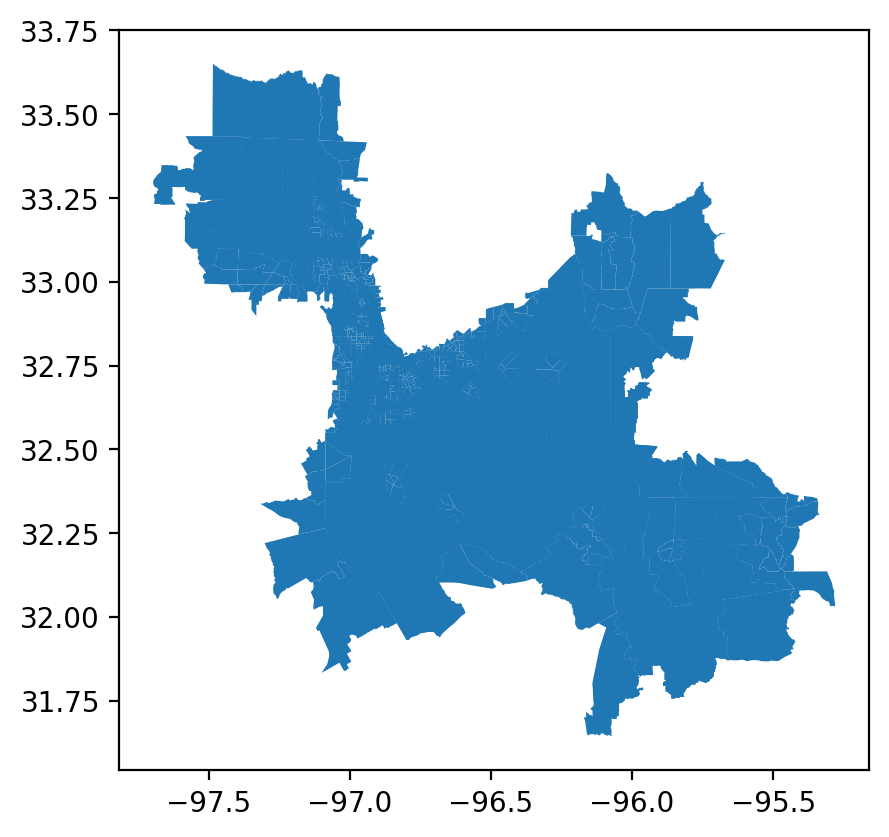

In [3]:
pee = gpd.read_file('Submarket_Tracts.shp')
pee.plot();

## 3. Assigns tracts but leaves borders

In [4]:
import geopandas as gpd
import pandas as pd

# Load the shapefiles
tracts = gpd.read_file('State Census Tracts/Texas/tl_2023_48_tract.shp')
submarkets = gpd.read_file('Shapefiles/Dallas - Suburban.shp')

# Convert CRS to EPSG:4269
tracts = tracts.to_crs(epsg=4269)
submarkets = submarkets.to_crs(epsg=4269)

# Calculate the area of each tract
tracts['tract_area'] = tracts.geometry.area

# Perform spatial join to find intersections
intersections = gpd.overlay(tracts, submarkets, how='intersection')

# Calculate the area of each intersection
intersections['intersection_area'] = intersections.geometry.area

# Calculate the percentage of the tract's area that overlaps with each submarket
intersections['area_percentage'] = intersections['intersection_area'] / intersections['tract_area']

# Find the submarket that contains the largest percentage of each tract's area
max_overlap = intersections.loc[intersections.groupby('GEOID')['area_percentage'].idxmax()]

# Merge the results back with the original tracts GeoDataFrame
result_gdf = tracts.merge(max_overlap[['GEOID', 'Submarket']], on='GEOID', how='inner')

# Save to new shapefile
result_gdf.to_file('Submarket_Tracts.shp')

# Save to CSV
result_gdf[['GEOID', 'Submarket']].to_csv('Submarket_Tracts.csv', index=False)

/tmp/ipykernel_901026/580695462.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts['tract_area'] = tracts.geometry.area
/users/lkemp/.local/lib/python3.11/site-packages/geopandas/geodataframe.py:1816: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
/tmp/ipykernel_901026/580695462.py:16: UserWarning: `keep_geom_type=True` in overlay resulted in 5851 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersections = gpd.overlay(tracts, submarkets, how='intersection')
/tmp/ipykernel_901026/580695462.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected

Files saved: Submarket_Tracts.shp and Submarket_Tracts.csv


<Axes: >

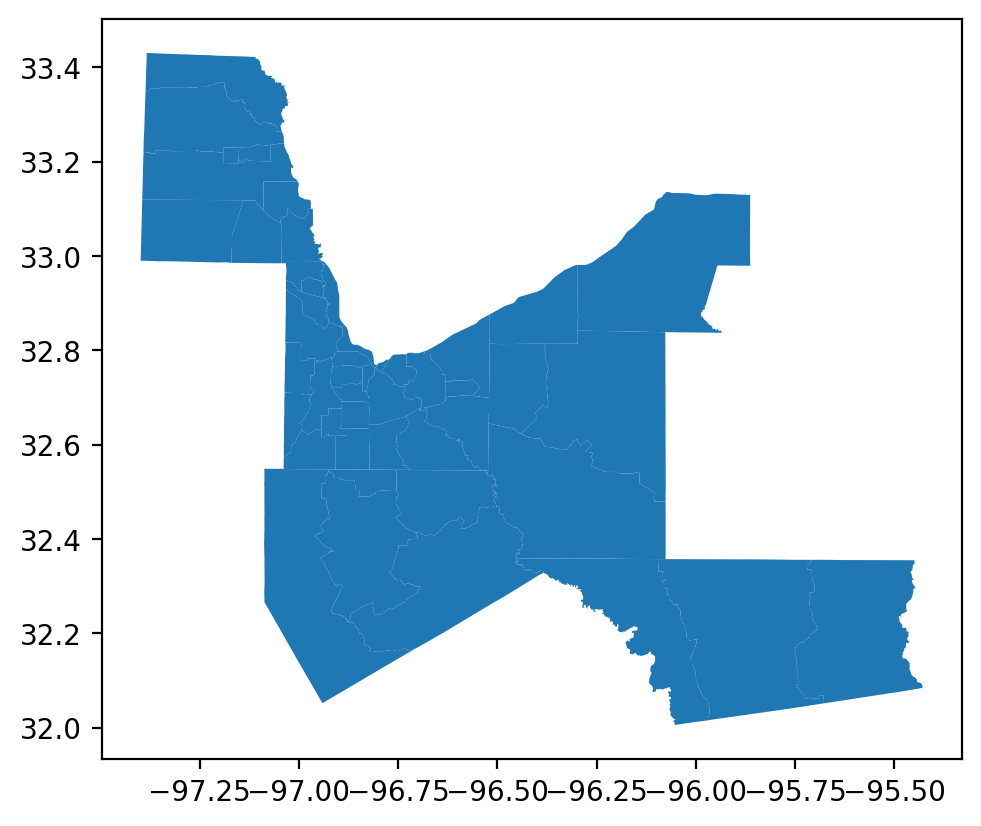

In [8]:
pee = gpd.read_file('Submarket_Tracts.shp')
submarkets.plot()

## 4. Attempt to remove border tracts from (3)

In [13]:
import geopandas as gpd

# Load the shapefile with assigned submarkets
result_gdf = gpd.read_file('Submarket_Tracts.shp')
submarkets = gpd.read_file('Shapefiles/Dallas - Suburban.shp')

# Convert CRS to EPSG:4269
result_gdf = result_gdf.to_crs(epsg=4269)
submarkets = submarkets.to_crs(epsg=4269)

# Calculate centroids of the tracts
result_gdf['centroid'] = result_gdf.geometry.centroid

# Create a GeoDataFrame from centroids
centroids = gpd.GeoDataFrame(result_gdf[['GEOID', 'Submarket']], geometry=result_gdf['centroid'], crs=result_gdf.crs)

# Perform spatial join to check if centroids fall within any submarket
centroids_in_submarkets = gpd.sjoin(centroids, submarkets, how='inner', op='within')

# Filter out tracts whose centroids do not fall within any submarket
filtered_gdf = result_gdf[result_gdf['GEOID'].isin(centroids_in_submarkets['GEOID'])]

# Save to new shapefile
#filtered_gdf.to_file('Filtered_Submarket_Tracts.shp')

# Save to CSV
filtered_gdf[['GEOID', 'Submarket']].to_csv('Filtered_Submarket_Tracts.csv', index=False)

print("Files saved: Filtered_Submarket_Tracts.shp and Filtered_Submarket_Tracts.csv")


Files saved: Filtered_Submarket_Tracts.shp and Filtered_Submarket_Tracts.csv


/tmp/ipykernel_901026/2279705917.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  result_gdf['centroid'] = result_gdf.geometry.centroid
/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

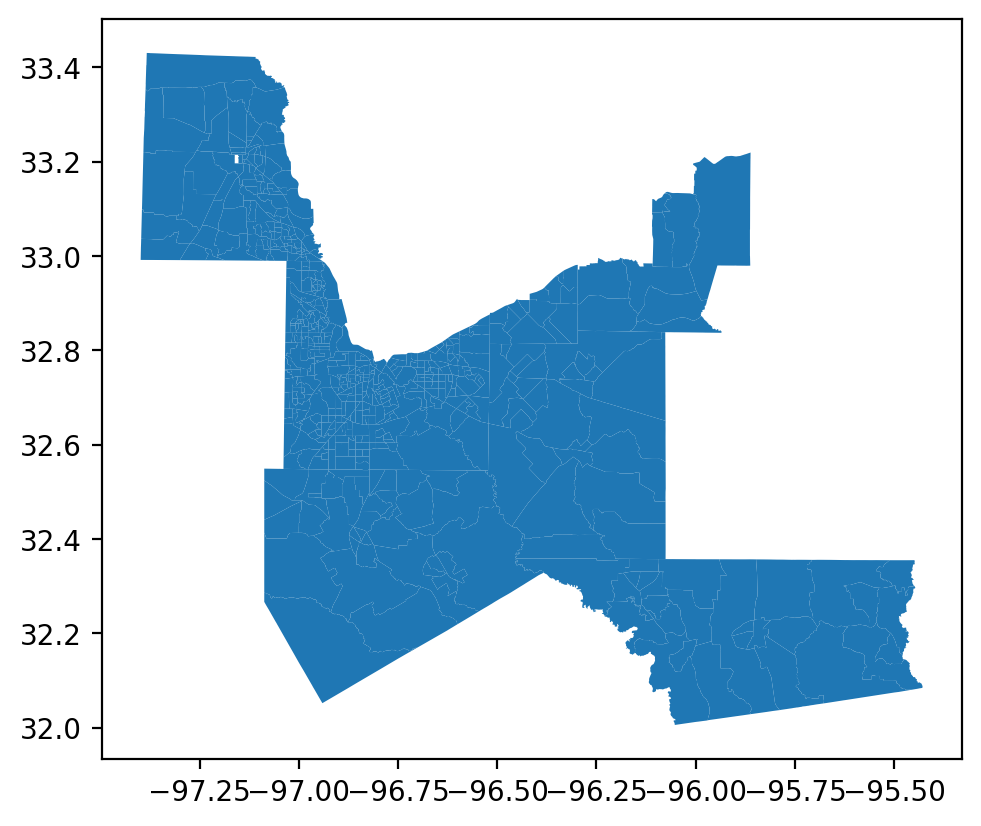

In [14]:
filtered_gdf.plot()

<Axes: >

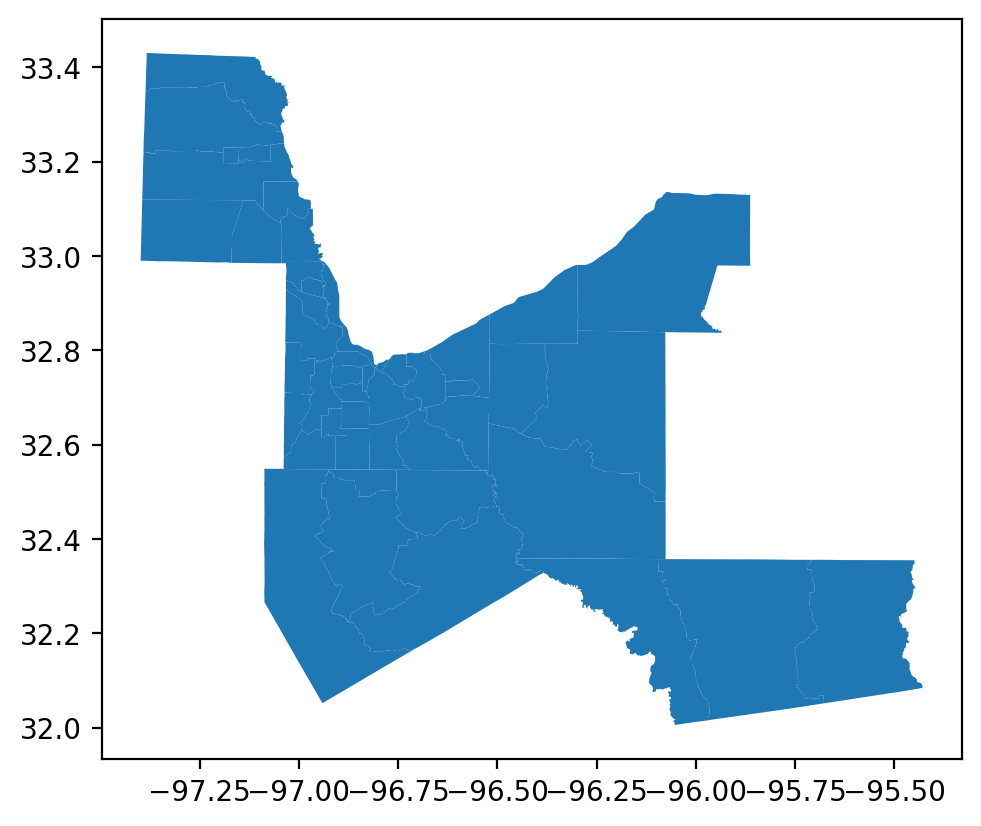

In [15]:
submarkets.plot()

## 5. Using ArcGIS Tract Map to assign submarkets (Code from (3))

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load shapefiles
tracts = gpd.read_file('Tampa Unsorted/TampaTracts.shp')
submarkets = gpd.read_file('Shapefiles/Tampa - St Petersburg - Clearwater.shp')

# Convert CRS
tracts = tracts.to_crs(epsg=4269)
submarkets = submarkets.to_crs(epsg=4269)

# Calculate the area of each tract
tracts['tract_area'] = tracts.geometry.area

# Perform spatial join to find intersections
intersections = gpd.overlay(tracts, submarkets, how='intersection')

# Calculate the area of each intersection
intersections['intersection_area'] = intersections.geometry.area

# Calculate the percentage of the tract's area that overlaps with each submarket
intersections['area_percentage'] = intersections['intersection_area'] / intersections['tract_area']

# Find the submarket that contains the largest percentage of each tract's area
max_overlap = intersections.loc[intersections.groupby('GEOID')['area_percentage'].idxmax()]

# Merge the results back with the original tracts GeoDataFrame
result_gdf = tracts.merge(max_overlap[['GEOID', 'Submarket']], on='GEOID', how='inner')

# Save to new shapefile
result_gdf.to_file('Submarket_Tracts.shp')

# Save to CSV
result_gdf[['GEOID', 'Submarket']].to_csv('Submarket_Tracts.csv', index=False)

/tmp/ipykernel_1661158/1484940317.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts['tract_area'] = tracts.geometry.area
/tmp/ipykernel_1661158/1484940317.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersections['intersection_area'] = intersections.geometry.area


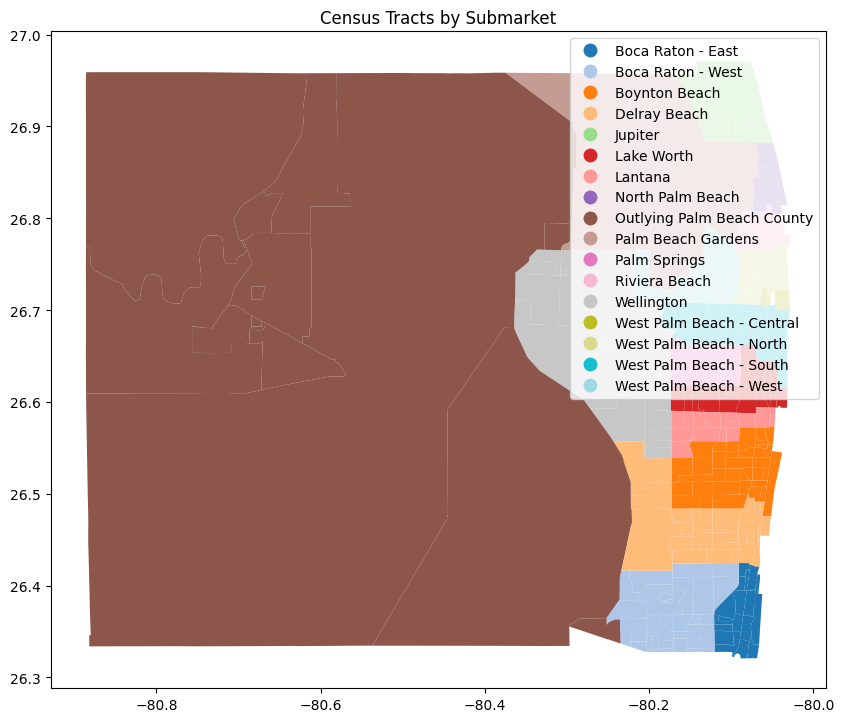

"\n# Plotting the census tracts colored by submarket\nfig, ax = plt.subplots(1, 1, figsize=(15, 15))\nresult_gdf.plot(column='Submarket', ax=ax, legend=True, cmap='tab20', alpha=0.6)\n\n# Plot the submarket boundaries\nsubmarkets.boundary.plot(ax=ax, color='black', linewidth=1)\n\n# Add labels to the submarkets\nfor x, y, label in zip(submarkets.geometry.centroid.x, submarkets.geometry.centroid.y, submarkets['Submarket']):\n    ax.text(x, y, label, fontsize=12, ha='center', color='black', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))\n\nplt.title('Census Tracts by Submarket')\nplt.show()\n"

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
result_gdf.plot(column='Submarket', ax=ax, legend=True, cmap='tab20')
plt.title('Census Tracts by Submarket')
plt.show()

####
'''
# Plotting the census tracts colored by submarket
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
result_gdf.plot(column='Submarket', ax=ax, legend=True, cmap='tab20', alpha=0.6)

# Plot the submarket boundaries
submarkets.boundary.plot(ax=ax, color='black', linewidth=1)

# Add labels to the submarkets
for x, y, label in zip(submarkets.geometry.centroid.x, submarkets.geometry.centroid.y, submarkets['Submarket']):
    ax.text(x, y, label, fontsize=12, ha='center', color='black', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.title('Census Tracts by Submarket')
plt.show()
'''